# English Sentiment Analysis

In [1]:
import pandas as pd
from ftfy import fix_text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import nltk
from langdetect import detect, LangDetectException
from tqdm import tqdm
import html
import string
import re
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\Shosh\Desktop\Univeristy\Semester 6\Data Science\Project\english dataset.csv", encoding="ISO-8859-1", header=None)
df.head()


,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
columns = ["target", "ids", "date", "flag", "user", "tweet"]
df.columns= columns
df.head()

,target,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   tweet   1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
tweet     0
dtype: int64

In [7]:
# extract el cols el me7taga
data = df[['tweet','target']]
data.head()


,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


## Tweet Cleaning

In [13]:
data['tweet'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [13]:
def clean_tweet(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove @mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with one
    return text.strip()




In [14]:
clean_tweet(data['tweet'][0])

"- A that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"

In [15]:
data['tweet'] = data['tweet'].apply(clean_tweet)

C:\Users\Shosh\AppData\Local\Temp\ipykernel_17212\2139904303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = data['tweet'].apply(clean_tweet)


In [16]:
data.head(10)

,tweet,target
0,- A that's a bummer. You shoulda got David Car...,0
1,is upset that he can't update his Facebook by ...,0
2,I dived many times for the ball. Managed to sa...,0
3,my whole body feels itchy and like its on fire,0
4,"no, it's not behaving at all. i'm mad. why am ...",0
5,not the whole crew,0
6,Need a hug,0
7,"hey long time no see! Yes.. Rains a bit ,only ...",0
8,nope they didn't have it,0
9,que me muera ?,0


## Normalization

In [14]:
import re

def normalize_text(text):
    # Lowercase
    text = text.lower()

    # Preserve sentiment punctuation (! ? . ,) and remove the rest
    text = re.sub(r"[^a-z0-9\s.,!?']", '', text)

    # Normalize repeated punctuation (e.g., "!!!" → "!")
    text = re.sub(r'([!?.,])\1+', r'\1', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [18]:
data['normalized_tweet'] = data['tweet'].apply(normalize_text)


C:\Users\Shosh\AppData\Local\Temp\ipykernel_17212\881401672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalized_tweet'] = data['tweet'].apply(normalize_text)


In [19]:
data.head(10)

,tweet,target,normalized_tweet
0,- A that's a bummer. You shoulda got David Car...,0,a that's a bummer. you shoulda got david carr ...
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his facebook by ...
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball. managed to sa...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am ...",0,"no, it's not behaving at all. i'm mad. why am ..."
5,not the whole crew,0,not the whole crew
6,Need a hug,0,need a hug
7,"hey long time no see! Yes.. Rains a bit ,only ...",0,"hey long time no see! yes. rains a bit ,only a..."
8,nope they didn't have it,0,nope they didn't have it
9,que me muera ?,0,que me muera ?


In [20]:
import ftfy  # fixes text for you!

# install it first if needed: pip install ftfy

data["normalized_tweet"] = data["normalized_tweet"].apply(fix_text)


C:\Users\Shosh\AppData\Local\Temp\ipykernel_17212\76191462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["normalized_tweet"] = data["normalized_tweet"].apply(fix_text)


## Duplication

In [21]:
duplicates=data.duplicated(subset='normalized_tweet')
counts= duplicates.value_counts()
print(counts)

False    1535027
True       64973
Name: count, dtype: int64


In [22]:
data.duplicated().sum()

np.int64(47969)

In [23]:
#Find duplicated tweets
conflicts = data[data.duplicated(subset='normalized_tweet', keep=False)]

#Group by tweet and collect targets
conflicting_tweets = conflicts.groupby('normalized_tweet')['target'].apply(list)

#Filter only tweets that have conflicting targets
conflicting_tweets = conflicting_tweets[conflicting_tweets.apply(lambda x: len(set(x)) > 1)]

#Create a DataFrame for display
conflicting_tweets_df = pd.DataFrame({
    'normalized_tweet': conflicting_tweets.index,
    'Conflicting Targets': conflicting_tweets.values
})

#Truncate long lists in 'Conflicting Targets' (show first 5 elements)
conflicting_tweets_df['Conflicting Targets'] = conflicting_tweets_df['Conflicting Targets'].apply(
    lambda x: f"{x[:5]}... (total {len(x)})" if len(x) > 5 else x
)

#Set display options
pd.set_option('display.max_colwidth', 50)  # Limit tweet width
pd.set_option('display.width', 1000)       # Ensure table fits horizontally

# Display first 10 rows
print(conflicting_tweets_df.head(20))

# Optional: Show total count
print(f"\nTotal conflicting tweets: {len(conflicting_tweets_df)}")

                                     normalized_tweet              Conflicting Targets
0                                                      [0, 0, 0, 0, 0]... (total 3198)
1                                                   !    [0, 0, 0, 0, 0]... (total 28)
2                                                   ,     [0, 0, 4, 4, 4]... (total 6)
3                                                 , ?     [0, 0, 4, 4, 4]... (total 9)
4   , i guess that this will happen again this yea...                           [0, 4]
5   , your twitter page looks like on all resoluti...                     [0, 0, 0, 4]
6   , your twitter page looks like on big resoluti...                           [0, 4]
7                                                   .    [0, 0, 0, 0, 0]... (total 37)
8   . . . . i forgot the password for twitter . . ...                           [0, 4]
9                                                 . ?     [0, 4, 4, 4, 4]... (total 6)
10  . again! but you just cleaned it up o !

In [26]:
# Create a DataFrame for export (without truncation)
conflicting_tweets_df = pd.DataFrame({
    'normalized_tweet': conflicting_tweets.index,
    'Conflicting Targets': conflicting_tweets.values,
    'Number of Conflicts': conflicting_tweets.apply(len)  # Add count of conflicts
})

# Export to Excel (full content, no truncation)
output_file = "conflicting_tweets_full1.xlsx"
conflicting_tweets_df.to_excel(output_file, index=False)

print(f"Successfully saved all {len(conflicting_tweets_df)} conflicting tweets to '{output_file}'")

Successfully saved all 3658 conflicting tweets to 'conflicting_tweets_full1.xlsx'


In [ ]:
# def resolve_conflict(labels, tweet):
#     # Threshold for short tweets (adjust as needed)
#     word_count = len(tweet.split())
#     if word_count < 2:
#         return 'drop'
#
#     label_counts = pd.Series(labels).value_counts()
#
#     if len(label_counts) == 1:
#         return label_counts.index[0]
#     elif label_counts.get(0, 0) == label_counts.get(4, 0):
#         return 2  # Equal → Neutral
#     elif abs(label_counts.get(0, 0) - label_counts.get(4, 0)) == 1:
#         return 'drop'  # Too close, too risky
#     else:
#         return label_counts.idxmax()  # Strong majority


In [27]:
def resolve_conflict(labels, tweet):
    # Threshold for short tweets (adjust as needed)
    word_count = len(tweet.split())
    if word_count < 2:
        return 'drop'

    label_counts = pd.Series(labels).value_counts()

    if len(label_counts) == 1:
        return label_counts.index[0]
    elif label_counts.get(0, 0) == label_counts.get(4, 0):
        return 'drop'  # Previously neutral, now drop
    elif abs(label_counts.get(0, 0) - label_counts.get(4, 0)) == 1:
        return 'drop'  # Too close, too risky
    else:
        return label_counts.idxmax()  # Strong majority


In [28]:
#Group by normalized tweet
grouped = data.groupby("normalized_tweet")["target"].apply(list).reset_index(name="labels")

#Apply the conflict resolution function
grouped["resolved_label"] = grouped.apply(
    lambda row: resolve_conflict(row["labels"], row["normalized_tweet"]),
    axis=1
)

# Merge resolved labels back to main dataframe
data = data.merge(grouped[["normalized_tweet", "resolved_label"]], on="normalized_tweet", how="left")

#Drop rows marked as 'drop'
data = data[data["resolved_label"] != "drop"].copy()

#Update target column
data["target"] = data["resolved_label"]

#Drop the helper column
data.drop(columns=["resolved_label"], inplace=True)

# Optional: Reset index
data.reset_index(drop=True, inplace=True)


In [29]:
dups = data[data.duplicated(subset="normalized_tweet", keep=False)]
print(f"Total remaining duplicated normalized tweets: {len(dups)}")


Total remaining duplicated normalized tweets: 63199


In [30]:
conflicts_check = data.groupby("normalized_tweet")["target"].nunique()
conflicting_final = conflicts_check[conflicts_check > 1]
print(f"Tweets with conflicting labels after cleanup: {len(conflicting_final)}")


Tweets with conflicting labels after cleanup: 0


In [31]:
# Drop duplicate tweets after resolving conflicts
data = data.drop_duplicates(subset=["normalized_tweet"]).reset_index(drop=True)

# Check again for duplicates
dups = data[data.duplicated(subset="normalized_tweet", keep=False)]
print(f"Total remaining duplicated normalized tweets: {len(dups)}")


Total remaining duplicated normalized tweets: 0


In [32]:
data.duplicated().sum()

np.int64(0)

## Additional Text Cleaning
1. Remove unnecessary punctuation to enhance textual clarity.
2. Correct spelling errors to improve accuracy. If a word remains nonsensical after correction, it is classified as an outlier for removal.
3. Apply the TF-IDF model, which requires properly spelled words, to effectively identify and filter out low-value or meaningless terms.



In [33]:
data.shape

(1527194, 3)

In [34]:
data.head()

,tweet,target,normalized_tweet
0,- A that's a bummer. You shoulda got David Car...,0,a that's a bummer. you shoulda got david carr ...
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his facebook by ...
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball. managed to sa...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am ...",0,"no, it's not behaving at all. i'm mad. why am ..."


In [35]:
# Define punctuation considered meaningless (not including ? and !)
meaningless_punctuations = ["_", "-", "___", "....", "....", "...", "--"]

# Check if a token is meaningless punctuation
def contains_meaningless_punct(text):
    tokens = text.split()
    return any(
        re.fullmatch(rf"[{re.escape(punct)}]+", token) for punct in meaningless_punctuations for token in tokens
    )

# Detect tweets with meaningless punctuation tokens
punct_token_tweets = data[data["normalized_tweet"].apply(contains_meaningless_punct)]

# Show how many tweets contain these meaningless punctuations
print(f"Tweets with meaningless punctuation tokens: {len(punct_token_tweets)}")

# Display the first 10 tweets with meaningless punctuation
print(punct_token_tweets["normalized_tweet"].head(10))


Tweets with meaningless punctuation tokens: 40403
12     i couldn't bear to watch it. and i thought the...
79     wonders why someone that u like so much can ma...
100    body of missing northern calif. girl found pol...
184      is watching the hill . . .and its making me sad
220                       now your leaving me . gets sad
248    damn i am so late at filling this appraisal fo...
298    amazon s3 plugin not worked in my website . it...
528    fell asleep . . . really didn't mean too chris...
641    kutnerrrr! why? why? and to think that 13 is s...
643           i so hate homeworks . my head hurts so bad
Name: normalized_tweet, dtype: object


In [36]:
def remove_meaningless_punct_tokens(text):
    tokens = text.split()
    cleaned = [
        token for token in tokens
        if not re.fullmatch(rf"[{re.escape(string.punctuation)}]+", token)
    ]
    return " ".join(cleaned)


In [37]:
# Apply the function
data["normalized_tweet"] = data["normalized_tweet"].apply(remove_meaningless_punct_tokens)


In [38]:
# Count the tweets with meaningless punctuation after removal
remaining_punct_tweets = data[data["normalized_tweet"].apply(contains_meaningless_punct)]
print(f"Remaining tweets with meaningless punctuation tokens: {len(remaining_punct_tweets)}")


Remaining tweets with meaningless punctuation tokens: 0


In [39]:
# import pandas as pd
# from tqdm import tqdm
# from autocorrect import Speller

# # Initialize the spell checker once (faster than re-creating each time)
# spell = Speller(lang='en')  # You can set `fast=True` optionally for speed

# # Function to correct spelling for a single tweet
# def correct_spelling_autocorrect(text):
#     if isinstance(text, str):  # Ensure input is string
#         return spell(text)
#     return text  # Return unchanged if not string (for robustness)

# # Batch processing for large datasets
# def batch_process_spell_check(df, batch_size=10000):
#     corrected_texts = []
#     for start in tqdm(range(0, len(df), batch_size), desc="Spell Checking"):
#         batch = df["normalized_tweet"].iloc[start:start + batch_size]
#         corrected_batch = batch.apply(correct_spelling_autocorrect)
#         corrected_texts.extend(corrected_batch)
#     return corrected_texts

# # Apply to your DataFrame
# corrected_tweets = batch_process_spell_check(data)
# data["corrected_tweet"] = corrected_tweets

# # Save corrected version
# # data.to_csv("corrected_tweets_autocorrect.csv", index=False)


# print(data[["normalized_tweet", "corrected_tweet"]].head())


In [40]:
data["normalized_tweet"] = data["normalized_tweet"].apply(html.unescape)

In [41]:
data["normalized_tweet"] = data["normalized_tweet"].str.replace(r"ï½", "'", regex=True)


## Filtering
things I noticed:
1. numbers only without text
2. one/two words 3amla conflict gamed 
3. punctuation bas without text 

i will first detect then decide what needs to be removed

In [42]:
#Detect Short Tweets (possible outliers)
short_outliers = data[data["normalized_tweet"].str.split().apply(len) < 2]
print(f"Short tweets (2 tokens): {len(short_outliers)}")
print(short_outliers["normalized_tweet"].head(10))


Short tweets (2 tokens): 884
10921                     what
17466                 hangover
19497                     true
23118       yeah,unfortunately
30656                         
41854                whatever.
44900                         
46076                         
52014                   ?quot?
52982    borrrrrreeeeeeeeeeeed
Name: normalized_tweet, dtype: object


In [43]:
# Drop short tweets with less than 2 tokens
data = data[data["normalized_tweet"].str.split().apply(len) >= 2]


In [44]:
data.head()

,tweet,target,normalized_tweet
0,- A that's a bummer. You shoulda got David Car...,0,a that's a bummer. you shoulda got david carr ...
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his facebook by ...
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball. managed to sa...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am ...",0,"no, it's not behaving at all. i'm mad. why am ..."


In [45]:
#Detect Long Tweets
long_outliers = data[data["normalized_tweet"].str.split().apply(len) >= 100]
print(f"Long tweets (≥100 tokens): {len(long_outliers)}")
print(long_outliers["normalized_tweet"].head(3))


Long tweets (≥100 tokens): 0
Series([], Name: normalized_tweet, dtype: object)


In [46]:
# Regex pattern for detecting non-ASCII characters
import re

def is_garbled(text):
    return bool(re.search(r"[^\x00-\x7F]", text))

# Apply the check
weird_tweets = data[data["normalized_tweet"].apply(is_garbled)]

print(f"Tweets with non-ASCII (possibly garbled): {len(weird_tweets)}")
print(weird_tweets["normalized_tweet"].head(10))


Tweets with non-ASCII (possibly garbled): 0
Series([], Name: normalized_tweet, dtype: object)


In [47]:
# Replace common problematic characters
replacements = {
    '½': '0.5',
    '¼': '0.25',
    '¾': '0.75',
    'â€™': "'",
    'â€œ': '"',
    'â€': '"',
    'â€“': '-',  # en-dash
    'â€”': '-',  # em-dash
    'ï': '',     # junk
    'á': '',     # remove accented duplicates
    'ãª': '',    # junk
    'â': '',     # catch-all
}

def clean_garbled(text):
    for bad, good in replacements.items():
        text = text.replace(bad, good)
    return text

data["normalized_tweet"] = data["normalized_tweet"].apply(clean_garbled)


In [48]:
def is_garbled(text):
    return bool(re.search(r"[^\x00-\x7F]", text))

# Apply the check
weird_tweets = data[data["normalized_tweet"].apply(is_garbled)]

print(f"Tweets with non-ASCII (possibly garbled): {len(weird_tweets)}")
print(weird_tweets["normalized_tweet"].head(10))


Tweets with non-ASCII (possibly garbled): 0
Series([], Name: normalized_tweet, dtype: object)


In [49]:
def is_english(text):
    try:
        return detect(text) == "en"
    except LangDetectException:
        return False

# Prepare
batch_size = 10000
english_flags = []

# Loop over the data in batches
for start in tqdm(range(0, len(data), batch_size)):
    end = start + batch_size
    batch = data["normalized_tweet"].iloc[start:end]
    flags = [is_english(text) for text in batch]
    english_flags.extend(flags)

# Add results to DataFrame
data["is_english"] = english_flags

# Filter English tweets
data = data[data["is_english"]].drop(columns=["is_english"])


100%|██████████| 153/153 [1:42:01<00:00, 40.01s/it]


In [50]:
def is_garbled(text):
    return bool(re.search(r"[^\x00-\x7F]", text))

# Step 1: Find garbled tweets
garbled_mask = data["normalized_tweet"].apply(is_garbled)
garbled_tweets = data[garbled_mask]

# Step 2: Preview how many and what they look like
print(f"Garbled tweets found: {len(garbled_tweets)}")
print(garbled_tweets["normalized_tweet"].head(10))



Garbled tweets found: 0
Series([], Name: normalized_tweet, dtype: object)


In [51]:
# Drop anything still garbled
data = data[~garbled_mask]

In [52]:
#Detect Gibberish / Repeated Characters
def is_gibberish(text):
    return bool(re.search(r"(.)\1{4,}", text))  # e.g. "sooooo happy" or "aaaaaaah"

gibberish_tweets = data[data["normalized_tweet"].apply(is_gibberish)]
print(f"Gibberish-like tweets: {len(gibberish_tweets)}")
print(gibberish_tweets["normalized_tweet"].head(10))


Gibberish-like tweets: 26978
69        agreed, i saw the failwhale allllll day today.
111    i'm sooo sad! they killed off kutner on house ...
130    haha its so cooooold in the d! and no but you ...
168    i had on my page for sooooo long! until it got...
252    ooooooh! sealclap see, i download shitloads of...
263    poor socks luvvvvv the golden retriever! i wan...
265                          aaaaand the nausea is back.
270    oooooooo who with? im not neither but thats be...
313    oh! did i mention it? quotgooooood moooorniiii...
348    stupid movies we watched. mirrors ugggggh. sto...
Name: normalized_tweet, dtype: object


In [53]:
def normalize_repeats(text):
    return re.sub(r"(.)\1{2,}", r"\1\1", text)  # replace 3+ same chars with 2

# Apply it to the dataset
data["normalized_tweet"] = data["normalized_tweet"].apply(normalize_repeats)


In [54]:
gibberish_tweets = data[data["normalized_tweet"].apply(is_gibberish)]
print(f"Gibberish-like tweets: {len(gibberish_tweets)}")
print(gibberish_tweets["normalized_tweet"].head(10))

Gibberish-like tweets: 0
Series([], Name: normalized_tweet, dtype: object)


In [55]:
# # Detect Non-English Tweets, already handled bas bent2kd
# def is_non_english(text):
#     try:
#         return detect(text) != "en"
#     except LangDetectException:
#         return True

# data["non_english"] = data["corrected_tweet"].apply(is_non_english)
# non_english_tweets = data[data["non_english"] == True]
# print(f"Non-English tweets: {len(non_english_tweets)}")
# print(non_english_tweets["corrected_tweet"].head(10))


In [56]:
# Check tweets that contain ONLY numbers (possibly with spaces)
# Enable progress_apply for tqdm
tqdm.pandas()

# Define regex pattern to match ONLY numbers (and optional spaces between them)
number_only_pattern = re.compile(r"^\d+(?:\s+\d+)*$")

# Function to check for number-only tweets
def is_only_numbers(text):
    return bool(number_only_pattern.match(text))

# OPTIONAL: define batch size if your dataset is very large
batch_size = 10000

# Container for all matching tweets
only_numbers = pd.DataFrame()

# If dataset is small, you can skip batching and just use this:
# only_numbers = data[data["normalized_tweet"].progress_apply(is_only_numbers)]

# Batch processing
for i in tqdm(range(0, len(data), batch_size), desc="Processing batches"):
    batch = data.iloc[i:i + batch_size].copy()
    matched = batch[batch["normalized_tweet"].progress_apply(is_only_numbers)]
    only_numbers = pd.concat([only_numbers, matched], ignore_index=True)

print(f"\n✅ Found {len(only_numbers)} tweets with only numbers.")
print(only_numbers["normalized_tweet"].head())



Processing batches: 100%|██████████| 141/141 [00:05<00:00, 23.96it/s]


✅ Found 0 tweets with only numbers.
Series([], Name: normalized_tweet, dtype: object)


In [57]:
# Remove any digit sequences from within the tweets
def remove_numbers(text):
    return re.sub(r"\b\d+\b", "", text)  # remove standalone numbers

data["normalized_tweet"] = data["normalized_tweet"].apply(remove_numbers)


In [58]:

# Enable progress_apply for tqdm
tqdm.pandas()

# Define the batch size (adjust as needed)
batch_size = 10000

# Regex patterns for detecting numbers and text
number_pattern = r"\d"
text_pattern = r"[a-zA-Z]"

# Container to hold matching tweets
numbers_with_text = pd.DataFrame()

# Batch processing
for i in tqdm(range(0, len(data), batch_size), desc="Processing batches"):
    batch = data.iloc[i:i + batch_size].copy()

    # Filter tweets containing both numbers and letters
    matched_batch = batch[batch["normalized_tweet"].str.contains(number_pattern) &
                          batch["normalized_tweet"].str.contains(text_pattern)]

    # Concatenate matched tweets
    numbers_with_text = pd.concat([numbers_with_text, matched_batch], ignore_index=True)

# Output the number of matched tweets
print(f"Tweets with both text and numbers: {len(numbers_with_text)}")
print(numbers_with_text["normalized_tweet"].head())


Processing batches:   0%|          | 0/141 [00:00<?, ?it/s]

Processing batches: 100%|██████████| 141/141 [00:07<00:00, 19.60it/s]

Tweets with both text and numbers: 77265
0    some1 hacked my account on aim now i have to m...
1                       sorry! bed time came here gmt1
2    i miss my ps3, it's out of commission wutcha p...
3    i had such a nice day. too bad the rain comes ...
4    pray for me please, the ex is threatening to s...
Name: normalized_tweet, dtype: object


In [59]:
# Remove digits that appear inside words like "cool99"
data["normalized_tweet"] = data["normalized_tweet"].str.replace(r"\d+", "", regex=True)


In [60]:
# Enable progress_apply for tqdm
tqdm.pandas()

# Define the batch size (adjust as needed)
batch_size = 10000

# Regex patterns for detecting numbers and text
number_pattern = r"\d"
text_pattern = r"[a-zA-Z]"

# Container to hold matching tweets
numbers_with_text = pd.DataFrame()

# Batch processing
for i in tqdm(range(0, len(data), batch_size), desc="Processing batches"):
    batch = data.iloc[i:i + batch_size].copy()

    # Filter tweets containing both numbers and letters
    matched_batch = batch[batch["normalized_tweet"].str.contains(number_pattern) &
                          batch["normalized_tweet"].str.contains(text_pattern)]

    # Concatenate matched tweets
    numbers_with_text = pd.concat([numbers_with_text, matched_batch], ignore_index=True)

# Output the number of matched tweets
print(f"Tweets with both text and numbers: {len(numbers_with_text)}")
print(numbers_with_text["normalized_tweet"].head())


Processing batches: 100%|██████████| 141/141 [00:05<00:00, 26.82it/s]

Tweets with both text and numbers: 0
Series([], Name: normalized_tweet, dtype: object)


In [61]:
# Drop empty tweets
data = data[data["normalized_tweet"].str.strip().astype(bool)]


In [62]:
data.head(20)

,tweet,target,normalized_tweet
0,- A that's a bummer. You shoulda got David Car...,0,a that's a bummer. you shoulda got david carr ...
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his facebook by ...
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball. managed to sa...
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire
4,"no, it's not behaving at all. i'm mad. why am ...",0,"no, it's not behaving at all. i'm mad. why am ..."
5,not the whole crew,0,not the whole crew
6,Need a hug,0,need a hug
7,"hey long time no see! Yes.. Rains a bit ,only ...",0,"hey long time no see! yes. rains a bit ,only a..."
8,nope they didn't have it,0,nope they didn't have it
10,spring break in plain city... it's snowing,0,spring break in plain city. it's snowing


## Class Imbalance

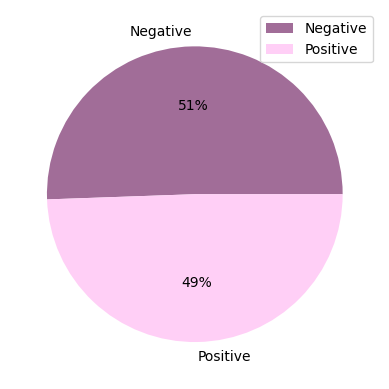

In [94]:
import matplotlib.pyplot as plt

# Your existing pie chart data
plt.pie(
    data['target'].value_counts(),
    labels=['Negative', 'Positive'],
    autopct="%1.0f%%",
    colors=['#A16D98', '#FFCFF6']  # Custom pastel colors
)
plt.legend()
plt.show()


## NLP (tokenization , stopwords and stemming)

In [66]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Example: Tokenize a single tweet
data["tokens"] = data["normalized_tweet"].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:

nltk.download('stopwords')

NEGATIONS = {"no", "nor", "not", "n't", "never", "none", "nobody", "nothing", "nowhere", "hardly", "scarcely", "barely", "wouldn't", "couldn't", "shouldn't", "won't", "can't", "don't", "doesn't", "didn't", "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "without"}

CUSTOM_STOPWORDS = set(stopwords.words('english'))
STOP_WORDS = CUSTOM_STOPWORDS - NEGATIONS
data["tokens"] = data["tokens"].apply(lambda x: [word for word in x if word not in STOP_WORDS])  



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:

stemmer = PorterStemmer()
data["tokens"] = data["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])


In [69]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.tokenize import word_tokenize
# from nltk.util import ngrams

# def trigram_tokenizer(text):
#     # Tokenize using a better tokenizer (NLTK here; spaCy works too)
#     tokens = word_tokenize(text.lower())
#     # Create trigrams
#     trigrams = [' '.join(gram) for gram in ngrams(tokens, 3)]
#     return trigrams

# tfidf = TfidfVectorizer(tokenizer=trigram_tokenizer, lowercase=False, max_features=5000, preprocessor=None)
# X_tfidf = tfidf.fit_transform(data["normalized_tweet"])


In [70]:
# import pickle

# with open("tfidf_vectorizer.pkl", "wb") as f:
#     pickle.dump(tfidf, f)

In [71]:
# from scipy.sparse import csr_matrix
#
# # Apply TF-IDF to your tweet data
# tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features if needed
# X_tfidf = tfidf.fit_transform(data["normalized_tweet"])
#
# # We can work with the sparse matrix directly without converting it to a dense DataFrame
# # If needed, we can convert the sparse matrix to a DataFrame later for analysis or export
#
# # For example, getting the feature names:
# feature_names = tfidf.get_feature_names_out()
#
# # If needed, you can convert it to a sparse DataFrame
# tfidf_sparse_df = pd.DataFrame.sparse.from_spmatrix(X_tfidf, columns=feature_names)
#
# # Show first 5 rows (or any sample)
# print(tfidf_sparse_df.head())


In [72]:
data.head()

,tweet,target,normalized_tweet,tokens
0,- A that's a bummer. You shoulda got David Car...,0,a that's a bummer. you shoulda got david carr ...,"['s, bummer, ., shoulda, got, david, carr, thi..."
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his facebook by ...,"[upset, ca, n't, updat, facebook, text, ., mig..."
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball. managed to sa...,"[dive, mani, time, ball, ., manag, save, rest,..."
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]"
4,"no, it's not behaving at all. i'm mad. why am ...",0,"no, it's not behaving at all. i'm mad. why am ...","[no, ,, 's, not, behav, ., 'm, mad, ., ?, ca, ..."


In [73]:
# Tokenization
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# Download tokenizer
nltk.download('punkt')

# Function to extract trigrams
def extract_trigrams(text):
    tokens = word_tokenize(text.lower())  # tokenize and lowercase
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return list(ngrams(stemmed_tokens, 3))

# Extract trigrams from all tweets
data['trigrams_token'] = data['normalized_tweet'].apply(extract_trigrams)

# Flatten all trigrams into a single list
all_trigrams = [trigram for tweet_trigrams in data['trigrams_token'] for trigram in tweet_trigrams]

# Count trigram frequencies
trigram_freq = Counter(all_trigrams)

# Convert to DataFrame for better viewing
trigram_df = pd.DataFrame(trigram_freq.items(), columns=['Trigram', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display results
print("\nTop trigrams:")
print(trigram_df.head(10))




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shosh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Top trigrams:
              Trigram  Frequency
460      (i, do, n't)      21178
82       (i, ca, n't)      18685
71         (., i, 'm)      15925
284     (i, have, to)      10964
347     (i, want, to)      10049
349      (to, go, to)       9596
122       (., it, 's)       9319
600        (!, i, 'm)       8964
1701  (ca, n't, wait)       8961
4835       (,, i, 'm)       8816


In [74]:
# # Convert trigrams to space-separated strings
# text_data = data['trigrams_token'].apply(lambda trigrams: ' '.join(['_'.join(trigram) for trigram in trigrams]))

# # Initialize and fit TF-IDF vectorizer
# vectorizer = TfidfVectorizer(max_features=5000)
# vectorizer.fit(text_data)

# # Save the fitted TF-IDF vectorizer
# with open("fitted_tfidf.pkl", "wb") as f:
#     pickle.dump(vectorizer, f)

# print("TF-IDF Vectorizer fitted and saved successfully!")

In [75]:
# import pandas as pd

# # Convert trigrams to space-separated strings
# text_data = data['trigrams_token'].apply(lambda trigrams: ' '.join(['_'.join(trigram) for trigram in trigrams]))

# # Initialize and fit TF-IDF vectorizer
# vectorizer = TfidfVectorizer(max_features=5000)
# vectorizer.fit(text_data)

# # Print a few transformed examples
# tfidf_transformed = vectorizer.transform(text_data)

# # Get feature names (trigrams in the vocabulary)
# feature_names = vectorizer.get_feature_names_out()

# # Convert TF-IDF matrix to a DataFrame for better readability
# tfidf_df = pd.DataFrame(tfidf_transformed.toarray(), columns=feature_names)

# # Display the first few rows to review the vectorized output
# print("Sample vectorized output:")
# print(tfidf_df.head())

# # Save the fitted TF-IDF vectorizer
# with open("fitted_tfidf.pkl", "wb") as f:
#     pickle.dump(vectorizer, f)

# print("TF-IDF Vectorizer fitted and saved successfully!")

In [76]:
# import pickle

# # Save the function and stemmer
# with open("tokenizer.pkl", "wb") as f:
#     pickle.dump(extract_trigrams, f)


In [77]:
data.head(20)

,tweet,target,normalized_tweet,tokens,trigrams_token
0,- A that's a bummer. You shoulda got David Car...,0,a that's a bummer. you shoulda got david carr ...,"['s, bummer, ., shoulda, got, david, carr, thi...","[(a, that, 's), (that, 's, a), ('s, a, bummer)..."
1,is upset that he can't update his Facebook by ...,0,is upset that he can't update his facebook by ...,"[upset, ca, n't, updat, facebook, text, ., mig...","[(is, upset, that), (upset, that, he), (that, ..."
2,I dived many times for the ball. Managed to sa...,0,i dived many times for the ball. managed to sa...,"[dive, mani, time, ball, ., manag, save, rest,...","[(i, dive, mani), (dive, mani, time), (mani, t..."
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]","[(my, whole, bodi), (whole, bodi, feel), (bodi..."
4,"no, it's not behaving at all. i'm mad. why am ...",0,"no, it's not behaving at all. i'm mad. why am ...","[no, ,, 's, not, behav, ., 'm, mad, ., ?, ca, ...","[(no, ,, it), (,, it, 's), (it, 's, not), ('s,..."
5,not the whole crew,0,not the whole crew,"[not, whole, crew]","[(not, the, whole), (the, whole, crew)]"
6,Need a hug,0,need a hug,"[need, hug]","[(need, a, hug)]"
7,"hey long time no see! Yes.. Rains a bit ,only ...",0,"hey long time no see! yes. rains a bit ,only a...","[hey, long, time, no, see, !, ye, ., rain, bit...","[(hey, long, time), (long, time, no), (time, n..."
8,nope they didn't have it,0,nope they didn't have it,"[nope, n't]","[(nope, they, did), (they, did, n't), (did, n'..."
10,spring break in plain city... it's snowing,0,spring break in plain city. it's snowing,"[spring, break, plain, citi, ., 's, snow]","[(spring, break, in), (break, in, plain), (in,..."


In [78]:
import pandas as pd

# Ensure full text is displayed
pd.set_option('display.max_colwidth', None)

# Filter for positive class where target == 4
df_positive = df[df['target'] == 4]

# Display first 20 rows without truncation
print(df_positive[['tweet', 'target']].head(20))

                                                                                                                                                   tweet  target
800000                                                                                                      I LOVE @Health4UandPets u guys r the best!!        4
800001                                                                          im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!       4
800002         @DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart.        4
800003                                          Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup       4
800004                                                                                                   @LovesBrooklyn2 he has that effect on everyone        4
800005             @ProductOfFear 

## bazbt el target

In [79]:
data.head()

,tweet,target,normalized_tweet,tokens,trigrams_token
0,- A that's a bummer. You shoulda got David Carr of Third Day to do it. ;D,0,a that's a bummer. you shoulda got david carr of third day to do it. d,"['s, bummer, ., shoulda, got, david, carr, third, day, .]","[(a, that, 's), (that, 's, a), ('s, a, bummer), (a, bummer, .), (bummer, ., you), (., you, shoulda), (you, shoulda, got), (shoulda, got, david), (got, david, carr), (david, carr, of), (carr, of, third), (of, third, day), (third, day, to), (day, to, do), (to, do, it), (do, it, .), (it, ., d)]"
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,is upset that he can't update his facebook by texting it. and might cry as a result school today also. blah!,"[upset, ca, n't, updat, facebook, text, ., might, cri, result, school, today, also, ., blah, !]","[(is, upset, that), (upset, that, he), (that, he, ca), (he, ca, n't), (ca, n't, updat), (n't, updat, hi), (updat, hi, facebook), (hi, facebook, by), (facebook, by, text), (by, text, it), (text, it, .), (it, ., and), (., and, might), (and, might, cri), (might, cri, as), (cri, as, a), (as, a, result), (a, result, school), (result, school, today), (school, today, also), (today, also, .), (also, ., blah), (., blah, !)]"
2,I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,i dived many times for the ball. managed to save the rest go out of bounds,"[dive, mani, time, ball, ., manag, save, rest, go, bound]","[(i, dive, mani), (dive, mani, time), (mani, time, for), (time, for, the), (for, the, ball), (the, ball, .), (ball, ., manag), (., manag, to), (manag, to, save), (to, save, the), (save, the, rest), (the, rest, go), (rest, go, out), (go, out, of), (out, of, bound)]"
3,my whole body feels itchy and like its on fire,0,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]","[(my, whole, bodi), (whole, bodi, feel), (bodi, feel, itchi), (feel, itchi, and), (itchi, and, like), (and, like, it), (like, it, on), (it, on, fire)]"
4,"no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.","[no, ,, 's, not, behav, ., 'm, mad, ., ?, ca, n't, see, .]","[(no, ,, it), (,, it, 's), (it, 's, not), ('s, not, behav), (not, behav, at), (behav, at, all), (at, all, .), (all, ., i), (., i, 'm), (i, 'm, mad), ('m, mad, .), (mad, ., whi), (., whi, am), (whi, am, i), (am, i, here), (i, here, ?), (here, ?, becaus), (?, becaus, i), (becaus, i, ca), (i, ca, n't), (ca, n't, see), (n't, see, you), (see, you, all), (you, all, over), (all, over, there), (over, there, .)]"


In [80]:
print(data["target"].unique())


[np.int64(0) np.int64(4)]


In [81]:
# Convert target to integers if they are valid
data["target"] = data["target"].apply(lambda x: int(x) if isinstance(x, (int, float)) else x)

# Check unique values again to see if they are consistent
print(data["target"].unique())


[0 4]


In [82]:
# # Convert target values according to the specified mapping
# data["target"] = data["target"].replace({0: -1, 2: 0, 4: 1})
#
# # Check unique values again to see if they are consistent
# print(data["target"].unique())


In [83]:
# Convert target values: 0 → -1, 4 → 1
data["target"] = data["target"].replace({0: -1, 4: 1})

# Check unique values again to ensure correctness
print(data["target"].unique())
# Drop neutral tweets if still present
data = data[data["target"] != 2]


[-1  1]


In [84]:
data.head()

,tweet,target,normalized_tweet,tokens,trigrams_token
0,- A that's a bummer. You shoulda got David Carr of Third Day to do it. ;D,-1,a that's a bummer. you shoulda got david carr of third day to do it. d,"['s, bummer, ., shoulda, got, david, carr, third, day, .]","[(a, that, 's), (that, 's, a), ('s, a, bummer), (a, bummer, .), (bummer, ., you), (., you, shoulda), (you, shoulda, got), (shoulda, got, david), (got, david, carr), (david, carr, of), (carr, of, third), (of, third, day), (third, day, to), (day, to, do), (to, do, it), (do, it, .), (it, ., d)]"
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,-1,is upset that he can't update his facebook by texting it. and might cry as a result school today also. blah!,"[upset, ca, n't, updat, facebook, text, ., might, cri, result, school, today, also, ., blah, !]","[(is, upset, that), (upset, that, he), (that, he, ca), (he, ca, n't), (ca, n't, updat), (n't, updat, hi), (updat, hi, facebook), (hi, facebook, by), (facebook, by, text), (by, text, it), (text, it, .), (it, ., and), (., and, might), (and, might, cri), (might, cri, as), (cri, as, a), (as, a, result), (a, result, school), (result, school, today), (school, today, also), (today, also, .), (also, ., blah), (., blah, !)]"
2,I dived many times for the ball. Managed to save 50% The rest go out of bounds,-1,i dived many times for the ball. managed to save the rest go out of bounds,"[dive, mani, time, ball, ., manag, save, rest, go, bound]","[(i, dive, mani), (dive, mani, time), (mani, time, for), (time, for, the), (for, the, ball), (the, ball, .), (ball, ., manag), (., manag, to), (manag, to, save), (to, save, the), (save, the, rest), (the, rest, go), (rest, go, out), (go, out, of), (out, of, bound)]"
3,my whole body feels itchy and like its on fire,-1,my whole body feels itchy and like its on fire,"[whole, bodi, feel, itchi, like, fire]","[(my, whole, bodi), (whole, bodi, feel), (bodi, feel, itchi), (feel, itchi, and), (itchi, and, like), (and, like, it), (like, it, on), (it, on, fire)]"
4,"no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",-1,"no, it's not behaving at all. i'm mad. why am i here? because i can't see you all over there.","[no, ,, 's, not, behav, ., 'm, mad, ., ?, ca, n't, see, .]","[(no, ,, it), (,, it, 's), (it, 's, not), ('s, not, behav), (not, behav, at), (behav, at, all), (at, all, .), (all, ., i), (., i, 'm), (i, 'm, mad), ('m, mad, .), (mad, ., whi), (., whi, am), (whi, am, i), (am, i, here), (i, here, ?), (here, ?, becaus), (?, becaus, i), (becaus, i, ca), (i, ca, n't), (ca, n't, see), (n't, see, you), (see, you, all), (you, all, over), (all, over, there), (over, there, .)]"


## Saving data to new csv file

In [85]:
#columns: normalized_tweet, tokens, target
selected_cols = data[['normalized_tweet', 'tokens','trigrams_token', 'target']]

# Save to CSV
selected_cols.to_csv('English_cleaned.csv', index=False)

